In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

from __future__ import print_function
import string

import numpy as np
import scipy.sparse as sparse

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.corpus import stopwords
from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import recall_score
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
data = pd.read_csv('input.csv',delimiter=';')

In [3]:
data = data.dropna()
print (data.shape)

(7999, 5)


In [4]:
print (data.head(3))

       Name      Artist     Mood  cluster  \
0  big-shot  billy-joel  Acerbic        3   
1  big-shot  billy-joel  Acerbic        4   
2  pressure  billy-joel  Acerbic        3   

                                              lyrics  
0  \tWell, you went uptown riding in your limousi...  
1  \tWell, you went uptown riding in your limousi...  
2  \tYou have to learn to pace yourself\tPressure...  


In [5]:
data.groupby('cluster')['lyrics'].count()

cluster
1    1493
2    1238
3    1877
4    1513
5    1878
Name: lyrics, dtype: int64

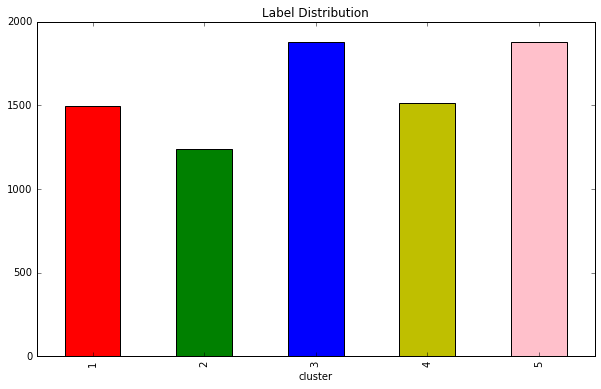

In [6]:
data.groupby('cluster')['lyrics'].count().plot(kind='bar',color=['r','g','b','y','pink'],title='Label Distribution',figsize=(10,6))

In [7]:
print ('Percentage of Cluster - 1 songs: %.2f %%' % ((data.groupby('cluster')['lyrics'].count()[1])*100.0/len(data)))
print ('Percentage of Cluster - 2 songs: %.2f %%' % ((data.groupby('cluster')['lyrics'].count()[2])*100.0/len(data)))
print ('Percentage of Cluster - 3 songs: %.2f %%' % ((data.groupby('cluster')['lyrics'].count()[3])*100.0/len(data)))
print ('Percentage of Cluster - 4 songs: %.2f %%' % ((data.groupby('cluster')['lyrics'].count()[4])*100.0/len(data)))
print ('Percentage of Cluster - 5 songs: %.2f %%' % ((data.groupby('cluster')['lyrics'].count()[5])*100.0/len(data)))

Percentage of Cluster - 1 songs: 18.66 %
Percentage of Cluster - 2 songs: 15.48 %
Percentage of Cluster - 3 songs: 23.47 %
Percentage of Cluster - 4 songs: 18.91 %
Percentage of Cluster - 5 songs: 23.48 %


In [8]:
def splitLyrics(input_data):
    c1 = data.loc[input_data['cluster']==1]
    c2 = data.loc[input_data['cluster']==2]
    c3 = data.loc[input_data['cluster']==3]
    c4 = data.loc[input_data['cluster']==4]
    c5 = data.loc[input_data['cluster']==5]
    return [c1,c2,c3,c4,c5]

In [9]:
[c1,c2,c3,c4,c5] = splitLyrics(data)

In [10]:
''''port = PorterStemmer()
wnl = WordNetLemmatizer()

def preprocessing(line):
    temp = " ".join([wnl.lemmatize(i) for i in line.split()])
    final = " ".join([port.stem(i) for i in temp.split()])
    final = final.lower().encode('utf-8')
    return final'''''

stemmer = PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
translation = string.maketrans(string.punctuation,' '*len(string.punctuation))



def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())
    for t in line:
        if(t not in stop):
            temp =  lemmatizer.lemmatize(t)
            stemmed = stemmer.stem(temp)
            tokens.append(stemmed)
    return ' '.join(tokens)

In [11]:
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []

rep=175

for index, row in c1.iterrows():
    lyric = preprocessing(row['lyrics'])
    artist = row['Artist']+" "
    artist = artist * rep
    lyric=artist+lyric
    cluster_1.append(lyric)
    
for index, row in c2.iterrows():
    lyric = preprocessing(row['lyrics'])
    artist = row['Artist']+" "
    artist = artist * rep
    lyric=artist+lyric
    cluster_2.append(lyric)
    
for index, row in c3.iterrows():
    lyric = preprocessing(row['lyrics'])
    artist = row['Artist']+" "
    artist = artist * rep
    lyric=artist+lyric
    cluster_3.append(lyric)
    
for index, row in c4.iterrows():
    lyric = preprocessing(row['lyrics'])
    artist = row['Artist']+" "
    artist = artist * rep
    lyric=artist+lyric
    cluster_4.append(lyric)
    
for index, row in c5.iterrows():
    lyric = preprocessing(row['lyrics'])
    artist = row['Artist']+" "
    artist = artist * rep
    lyric=artist+lyric
    cluster_5.append(lyric)

In [12]:
data = cluster_1 + cluster_2 + cluster_3 + cluster_4 + cluster_5
labels = np.concatenate((c1['cluster'].values,c2['cluster'].values,c3['cluster'].values,c4['cluster'].values,c5['cluster'].values))

In [13]:
[Data_train,Data_test,Train_labels,Test_labels] = train_test_split(data,labels , test_size=0.1, random_state=19071994,stratify=labels)

In [14]:
t = []
for line in Data_train:
    l = nltk.word_tokenize(line)
    for w in l:
        t.append(w)

In [15]:
word_features = nltk.FreqDist(t)
print (len(word_features))

16747


In [16]:
#PCA

In [17]:
vec_all = CountVectorizer()
ctr_features_all = vec_all.fit_transform(Data_train)

In [18]:
tf_vec_all = TfidfTransformer()
tr_features_all = tf_vec_all.fit_transform(ctr_features_all)

In [19]:
cte_features_all = vec_all.transform(Data_test)
te_features_all = tf_vec_all.transform(cte_features_all)

In [20]:
svd = TruncatedSVD(n_components=100)
tr_features_truncated = svd.fit_transform(tr_features_all)

In [21]:
te_features_truncated = svd.transform(te_features_all)

In [22]:
svd = TruncatedSVD(n_components=100)
ctr_features_truncated = svd.fit_transform(ctr_features_all)
cte_features_truncated = svd.transform(cte_features_all)

In [23]:
print (tr_features_truncated.shape)

(7199, 100)


In [24]:
#running different models

In [25]:
BNB_clf = BernoulliNB(binarize=0.0)
BNB_clf.fit(tr_features_truncated,Train_labels)
tfpredict = BNB_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
BNB_clf.fit(ctr_features_truncated,Train_labels)
cprediction = BNB_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("BernoulliNB")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

BernoulliNB
TF-IDF Accuracy
0.245
Count Accuracy
0.23875


In [27]:
pos_tr_features_truncated = []
xx=100005
for row in tr_features_truncated:
    lst = []
    for col in row:
        xx=min(xx,col)
        lst.append(col+0.645147554742)
    pos_tr_features_truncated.append(lst)
print (xx)    
pos_ctr_features_truncated = []

for row in ctr_features_truncated:
    lst = []
    for col in row:
        xx=min(xx,col)
        lst.append(col+248.99748832)
    pos_ctr_features_truncated.append(lst)
print (xx)

-0.645147554741
-248.997488319


In [28]:
MNB_clf = MultinomialNB(alpha=0.1)
MNB_clf.fit(pos_tr_features_truncated, Train_labels)
tfpredict = MNB_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
MNB_clf.fit(pos_ctr_features_truncated,Train_labels)
cprediction = MNB_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("MultinomialNB")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

MultinomialNB
TF-IDF Accuracy
0.3175
Count Accuracy
0.3375


In [29]:
LR_clf = linear_model.LogisticRegression(C=1e5)
LR_clf.fit(tr_features_truncated, Train_labels)
tfpredict = LR_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
LR_clf.fit(ctr_features_truncated,Train_labels)
cprediction = LR_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Logistic")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Logistic
TF-IDF Accuracy
0.33625
Count Accuracy
0.35125


In [31]:
LR_clf = linear_model.SGDClassifier()
LR_clf.fit(tr_features_truncated, Train_labels)
tfpredict = LR_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
LR_clf.fit(ctr_features_truncated,Train_labels)
cprediction = LR_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("SGDClassifier")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

SGDClassifier
TF-IDF Accuracy
0.325
Count Accuracy
0.2525


In [101]:
SVC_clf = svm.SVC()
SVC_clf.fit(tr_features_truncated, Train_labels)
tfpredict = SVC_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
SVC_clf.fit(ctr_features_truncated,Train_labels)
cprediction = SVC_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("SVC SVM")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

SVC SVM
TF-IDF Accuracy
0.29125
Count Accuracy
0.32375


In [102]:
NuSVC_clf = svm.NuSVC()
NuSVC_clf.fit(tr_features_truncated, Train_labels)
tfpredict = NuSVC_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
NuSVC_clf.fit(ctr_features_truncated,Train_labels)
cprediction = NuSVC_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("nuSVC SVM")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

nuSVC SVM
TF-IDF Accuracy
0.22125
Count Accuracy
0.32


In [32]:
LinearSVC_clf = svm.LinearSVC()
LinearSVC_clf.fit(tr_features_truncated, Train_labels)
tfpredict = LinearSVC_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
LinearSVC_clf.fit(ctr_features_truncated,Train_labels)
cprediction = LinearSVC_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("LinearSVC")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

LinearSVC
TF-IDF Accuracy
0.34125
Count Accuracy
0.26625


In [104]:
KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(tr_features_truncated, Train_labels)
tfpredict = KNN_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
KNN_clf.fit(ctr_features_truncated,Train_labels)
cprediction = KNN_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("KNN")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

KNN
TF-IDF Accuracy
0.29375
Count Accuracy
0.3125


In [105]:
P_clf = linear_model.Perceptron(n_iter=1000)
P_clf.fit(tr_features_truncated, Train_labels)
tfpredict = P_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
P_clf.fit(ctr_features_truncated,Train_labels)
cprediction = P_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Perceptron")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Perceptron
TF-IDF Accuracy
0.27
Count Accuracy
0.28375


In [106]:
DT_clf = DecisionTreeClassifier(random_state=20160121, criterion='entropy')
DT_clf.fit(tr_features_truncated, Train_labels)
tfpredict = DT_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
DT_clf.fit(ctr_features_truncated,Train_labels)
cprediction = DT_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Decision Tree")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Decision Tree
TF-IDF Accuracy
0.28
Count Accuracy
0.27875


In [107]:
#Feature Selection

In [33]:
topwords = [fpair[0] for fpair in list(word_features.most_common(8500))]

In [34]:
print (word_features.most_common(40))

[(u'frank-sinatra', 139125), (u'the-beatles', 131600), (u'--', 116375), (u'bob-dylan', 71750), (u'elvis-presley', 62825), (u'rem', 44625), (u'miles-davis', 40600), (u'willie-nelson', 40250), (u'david-bowie', 39550), (u'pearl-jam', 34300), (u'the-rolling-stones', 31500), (u'johnny-cash', 23800), (u'aretha-franklin', 21700), (u'ramones', 20475), (u'michael-jackson', 19775), (u'elvis-costello', 18375), (u'duke-ellington', 16275), (u'jimi-hendrix', 15400), (u'christina-aguilera', 13475), (u'neil-young', 13125), (u'love', 13013), (u'dolly-parton', 11900), (u'depeche-mode', 11725), (u'korn', 10681), (u'billy-joel', 10675), (u'oh', 9881), (u'acdc', 9800), (u'megadeth', 9625), (u'the-beach-boys', 9450), (u'the-jimi-hendrix-experience', 8925), (u'got', 8688), (u'stevie-wonder', 8575), (u'know', 8512), (u'george-jones', 7700), (u'get', 7638), (u'babi', 7612), (u'bb-king', 7525), (u'like', 7410), (u'his-orchestra', 7350), (u'go', 7190)]


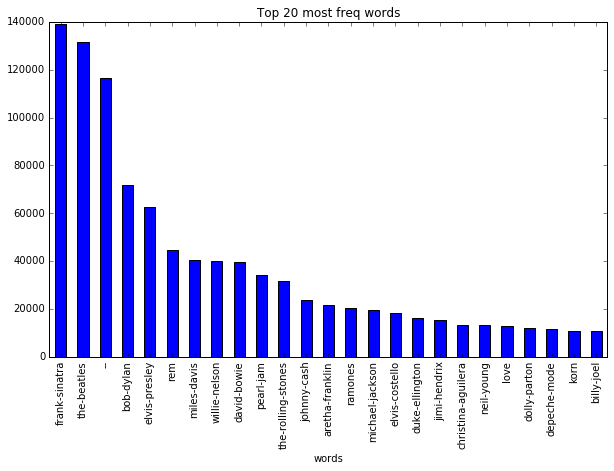

In [35]:
word_his = pd.DataFrame(word_features.most_common(25),columns=['words','count'])
word_his.plot(kind='bar',x=word_his['words'],legend=False,title='Top 20 most freq words',figsize=(10,6))

In [36]:
vec = CountVectorizer()
c_fit = vec.fit_transform([' '.join(topwords)])

In [37]:
tf_vec = TfidfTransformer()
tf_fit = tf_vec.fit_transform(c_fit)

In [38]:
ctr_features = vec.transform(Data_train)
tr_features = tf_vec.transform(ctr_features)

In [39]:
cte_features = vec.transform(Data_test)
te_features = tf_vec.transform(cte_features)

In [40]:
#running different models for feature selection

In [41]:
BNB_clf = BernoulliNB(binarize=0.0)
BNB_clf.fit(tr_features, Train_labels)
tfpredict = BNB_clf.predict(te_features)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
BNB_clf.fit(ctr_features,Train_labels)
cprediction = BNB_clf.predict(cte_features)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("BernoulliNB")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

BernoulliNB
TF-IDF Accuracy
0.31625
Count Accuracy
0.31625


In [42]:
MNB_clf = MultinomialNB()
MNB_clf.fit(tr_features, Train_labels)
tfpredict = MNB_clf.predict(te_features)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
MNB_clf.fit(ctr_features,Train_labels)
cprediction = MNB_clf.predict(cte_features)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("MultinomialNB")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

MultinomialNB
TF-IDF Accuracy
0.33875
Count Accuracy
0.34375


In [43]:
LR_clf = linear_model.LogisticRegression(C=1e5)
LR_clf.fit(tr_features, Train_labels)
tfpredict = LR_clf.predict(te_features)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
LR_clf.fit(ctr_features,Train_labels)
cprediction = LR_clf.predict(cte_features)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Logistic")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Logistic
TF-IDF Accuracy
0.3175
Count Accuracy
0.33125


In [119]:
SVC_clf = svm.SVC()
SVC_clf.fit(tr_features, Train_labels)
tfpredict = SVC_clf.predict(te_features)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
SVC_clf.fit(ctr_features,Train_labels)
cprediction = SVC_clf.predict(cte_features)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("SVC SVM")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

SVC SVM
TF-IDF Accuracy
0.235
Count Accuracy
0.335


In [120]:
NuSVC_clf = svm.NuSVC()
NuSVC_clf.fit(tr_features, Train_labels)
tfpredict = NuSVC_clf.predict(te_features)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
NuSVC_clf.fit(ctr_features,Train_labels)
cprediction = NuSVC_clf.predict(cte_features)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("nuSVC SVM")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

nuSVC SVM
TF-IDF Accuracy
0.3375
Count Accuracy
0.32125


In [44]:
LinearSVC_clf = svm.LinearSVC()
LinearSVC_clf.fit(tr_features, Train_labels)
tfpredict = LinearSVC_clf.predict(te_features)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
LinearSVC_clf.fit(ctr_features,Train_labels)
cprediction = LinearSVC_clf.predict(cte_features)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("LinearSVC")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

LinearSVC
TF-IDF Accuracy
0.3375
Count Accuracy
0.25875


In [122]:
KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(tr_features, Train_labels)
tfpredict = KNN_clf.predict(te_features)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
KNN_clf.fit(ctr_features,Train_labels)
cprediction = KNN_clf.predict(cte_features)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("KNN")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

KNN
TF-IDF Accuracy
0.3025
Count Accuracy
0.29


In [123]:
P_clf = linear_model.Perceptron(n_iter=1000)
P_clf.fit(tr_features, Train_labels)
tfpredict = P_clf.predict(te_features)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
P_clf.fit(ctr_features,Train_labels)
cprediction = P_clf.predict(cte_features)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Perceptron")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Perceptron
TF-IDF Accuracy
0.27375
Count Accuracy
0.3


In [124]:
DT_clf = DecisionTreeClassifier(random_state=20160121, criterion='entropy')
DT_clf.fit(tr_features, Train_labels)
tfpredict = DT_clf.predict(te_features)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
DT_clf.fit(ctr_features,Train_labels)
cprediction = DT_clf.predict(cte_features)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Decision Tree")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Decision Tree
TF-IDF Accuracy
0.27125
Count Accuracy
0.285


In [45]:
# Using Bigrams

In [46]:
vec_all = CountVectorizer(ngram_range=(1,2))
ctr_features_all = vec_all.fit_transform(Data_train)

In [47]:
tf_vec_all = TfidfTransformer()
tr_features_all = tf_vec_all.fit_transform(ctr_features_all)

In [48]:
cte_features_all = vec_all.transform(Data_test)
te_features_all = tf_vec_all.transform(cte_features_all)

In [49]:
print ((ctr_features_all.shape))

(7199, 136463)


In [50]:
BNB_clf = BernoulliNB(binarize=0.0)
BNB_clf.fit(tr_features_all, Train_labels)
tfpredict = BNB_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
BNB_clf.fit(ctr_features_all,Train_labels)
cprediction = BNB_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("BernoulliNB")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

BernoulliNB
TF-IDF Accuracy
0.30625
Count Accuracy
0.30625


In [51]:
MNB_clf = MultinomialNB()
MNB_clf.fit(tr_features_all, Train_labels)
tfpredict = MNB_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
MNB_clf.fit(ctr_features_all,Train_labels)
cprediction = MNB_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("MultinomialNB")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

MultinomialNB
TF-IDF Accuracy
0.3425
Count Accuracy
0.36125


In [52]:
LR_clf = linear_model.LogisticRegression(C=1e5)
LR_clf.fit(tr_features_all, Train_labels)
tfpredict = LR_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
LR_clf.fit(ctr_features_all,Train_labels)
cprediction = LR_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Logistic")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Logistic
TF-IDF Accuracy
0.32
Count Accuracy
0.315


In [154]:
SVC_clf = svm.SVC()
SVC_clf.fit(tr_features_all, Train_labels)
tfpredict = SVC_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
SVC_clf.fit(ctr_features_all,Train_labels)
cprediction = SVC_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("SVC SVM")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

SVC SVM
TF-IDF Accuracy
0.235
Count Accuracy
0.33375


In [155]:
NuSVC_clf = svm.NuSVC()
NuSVC_clf.fit(tr_features_all, Train_labels)
tfpredict = NuSVC_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
NuSVC_clf.fit(ctr_features_all,Train_labels)
cprediction = NuSVC_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("nuSVC SVM")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

nuSVC SVM
TF-IDF Accuracy
0.2775
Count Accuracy
0.3275


In [53]:
LinearSVC_clf = svm.LinearSVC()
LinearSVC_clf.fit(tr_features_all, Train_labels)
tfpredict = LinearSVC_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
LinearSVC_clf.fit(ctr_features_all,Train_labels)
cprediction = LinearSVC_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("LinearSVC")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

LinearSVC
TF-IDF Accuracy
0.34625
Count Accuracy
0.27


In [157]:
KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(tr_features_all, Train_labels)
tfpredict = KNN_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
KNN_clf.fit(ctr_features_all,Train_labels)
cprediction = KNN_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("KNN")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

KNN
TF-IDF Accuracy
0.295
Count Accuracy
0.28625


In [158]:
P_clf = linear_model.Perceptron(n_iter=1000)
P_clf.fit(tr_features_all, Train_labels)
tfpredict = P_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
P_clf.fit(ctr_features_all,Train_labels)
cprediction = P_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Perceptron")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Perceptron
TF-IDF Accuracy
0.27
Count Accuracy
0.27625


In [159]:
DT_clf = DecisionTreeClassifier(random_state=20160121, criterion='entropy')
DT_clf.fit(tr_features_all, Train_labels)
tfpredict = DT_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
DT_clf.fit(ctr_features_all,Train_labels)
cprediction = DT_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Decision Tree")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Decision Tree
TF-IDF Accuracy
0.29
Count Accuracy
0.285


In [160]:
#Using Trigrams

In [54]:
## using countvectorizer to generate count vectors for the training data.
vec_all = CountVectorizer(ngram_range=(1,3))
ctr_features_all = vec_all.fit_transform(Data_train)

In [55]:
tf_vec_all = TfidfTransformer()
tr_features_all = tf_vec_all.fit_transform(ctr_features_all)

In [56]:
cte_features_all = vec_all.transform(Data_test)
te_features_all = tf_vec_all.transform(cte_features_all)

In [57]:
print ((ctr_features_all.shape))

(7199, 301479)


In [58]:
BNB_clf = BernoulliNB(binarize=0.0)
BNB_clf.fit(tr_features_all, Train_labels)
tfpredict = BNB_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
BNB_clf.fit(ctr_features_all,Train_labels)
cprediction = BNB_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("BernoulliNB")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

BernoulliNB
TF-IDF Accuracy
0.29375
Count Accuracy
0.29375


In [59]:
MNB_clf = MultinomialNB()
MNB_clf.fit(tr_features_all, Train_labels)
tfpredict = MNB_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
MNB_clf.fit(ctr_features_all,Train_labels)
cprediction = MNB_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("MultinomialNB")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

MultinomialNB
TF-IDF Accuracy
0.34
Count Accuracy
0.35125


In [60]:
LR_clf = linear_model.LogisticRegression(C=1e5)
LR_clf.fit(tr_features_all, Train_labels)
tfpredict = LR_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
LR_clf.fit(ctr_features_all,Train_labels)
cprediction = LR_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Logistic")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Logistic
TF-IDF Accuracy
0.3125
Count Accuracy
0.3175


In [168]:
SVC_clf = svm.SVC()
SVC_clf.fit(tr_features_all, Train_labels)
tfpredict = SVC_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
SVC_clf.fit(ctr_features_all,Train_labels)
cprediction = SVC_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("SVC SVM")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

SVC SVM
TF-IDF Accuracy
0.235
Count Accuracy
0.335


In [169]:
NuSVC_clf = svm.NuSVC()
NuSVC_clf.fit(tr_features_all, Train_labels)
tfpredict = NuSVC_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
NuSVC_clf.fit(ctr_features_all,Train_labels)
cprediction = NuSVC_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("nuSVC SVM")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

nuSVC SVM
TF-IDF Accuracy
0.27875
Count Accuracy
0.33


In [61]:
LinearSVC_clf = svm.LinearSVC()
LinearSVC_clf.fit(tr_features_all, Train_labels)
tfpredict = LinearSVC_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
LinearSVC_clf.fit(ctr_features_all,Train_labels)
cprediction = LinearSVC_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("LinearSVC")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

LinearSVC
TF-IDF Accuracy
0.3475
Count Accuracy
0.245


In [171]:
KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(tr_features_all, Train_labels)
tfpredict = KNN_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
KNN_clf.fit(ctr_features_all,Train_labels)
cprediction = KNN_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("KNN")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

KNN
TF-IDF Accuracy
0.2725
Count Accuracy
0.3


In [172]:
P_clf = linear_model.Perceptron(n_iter=1000)
P_clf.fit(tr_features_all, Train_labels)
tfpredict = P_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
P_clf.fit(ctr_features_all,Train_labels)
cprediction = P_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Perceptron")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Perceptron
TF-IDF Accuracy
0.2825
Count Accuracy
0.2875


In [173]:
DT_clf = DecisionTreeClassifier(random_state=20160121, criterion='entropy')
DT_clf.fit(tr_features_all, Train_labels)
tfpredict = DT_clf.predict(te_features_all)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
DT_clf.fit(ctr_features_all,Train_labels)
cprediction = DT_clf.predict(cte_features_all)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Decision Tree")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Decision Tree
TF-IDF Accuracy
0.27625
Count Accuracy
0.28125


In [125]:
#PCA + bigram

In [126]:
vec_all = CountVectorizer(ngram_range=(1,2))
ctr_features_all = vec_all.fit_transform(Data_train)

In [127]:
tf_vec_all = TfidfTransformer()
tr_features_all = tf_vec_all.fit_transform(ctr_features_all)

In [128]:
cte_features_all = vec_all.transform(Data_test)
te_features_all = tf_vec_all.transform(cte_features_all)

In [129]:
svd = TruncatedSVD(n_components=200)
tr_features_truncated = svd.fit_transform(tr_features_all)

In [130]:
te_features_truncated = svd.transform(te_features_all)

In [131]:
svd = TruncatedSVD(n_components=200)
ctr_features_truncated = svd.fit_transform(ctr_features_all)
cte_features_truncated = svd.transform(cte_features_all)

In [132]:
#running models

In [133]:
BNB_clf = BernoulliNB(binarize=0.0)
BNB_clf.fit(tr_features_truncated, Train_labels)
tfpredict = BNB_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
BNB_clf.fit(ctr_features_truncated,Train_labels)
cprediction = BNB_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("BernoulliNB")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

BernoulliNB
TF-IDF Accuracy
0.2475
Count Accuracy
0.245


In [137]:
pos_tr_features_truncated = []
xx=100005
for row in tr_features_truncated:
    lst = []
    for col in row:
        xx=min(xx,col)
        lst.append(col+0.6896572973)
    pos_tr_features_truncated.append(lst)
print (xx)    
pos_ctr_features_truncated = []

for row in ctr_features_truncated:
    lst = []
    for col in row:
        xx=min(xx,col)
        lst.append(col+339.778447405)
    pos_ctr_features_truncated.append(lst)
print (xx)

-0.689657297299
-339.778447404


In [138]:
MNB_clf = MultinomialNB()
MNB_clf.fit(pos_tr_features_truncated, Train_labels)
tfpredict = MNB_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
MNB_clf.fit(pos_ctr_features_truncated,Train_labels)
cprediction = MNB_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("MultinomialNB")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

MultinomialNB
TF-IDF Accuracy
0.32125
Count Accuracy
0.33875


In [139]:
LR_clf = linear_model.LogisticRegression(C=1e5)
LR_clf.fit(tr_features_truncated, Train_labels)
tfpredict = LR_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
LR_clf.fit(ctr_features_truncated,Train_labels)
cprediction = LR_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Logistic")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Logistic
TF-IDF Accuracy
0.335
Count Accuracy
0.3325


In [140]:
SVC_clf = svm.SVC()
SVC_clf.fit(tr_features_truncated, Train_labels)
tfpredict = SVC_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
SVC_clf.fit(ctr_features_truncated,Train_labels)
cprediction = SVC_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("SVC SVM")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

SVC SVM
TF-IDF Accuracy
0.2575
Count Accuracy
0.3225


In [141]:
NuSVC_clf = svm.NuSVC()
NuSVC_clf.fit(tr_features_truncated, Train_labels)
tfpredict = NuSVC_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
NuSVC_clf.fit(ctr_features_truncated,Train_labels)
cprediction = NuSVC_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("nuSVC SVM")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

nuSVC SVM
TF-IDF Accuracy
0.28
Count Accuracy
0.32625


In [142]:
LinearSVC_clf = svm.LinearSVC()
LinearSVC_clf.fit(tr_features_truncated, Train_labels)
tfpredict = LinearSVC_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
LinearSVC_clf.fit(ctr_features_truncated,Train_labels)
cprediction = LinearSVC_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("LinearSVC")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

LinearSVC
TF-IDF Accuracy
0.3325
Count Accuracy
0.26375


In [143]:
KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(tr_features_truncated, Train_labels)
tfpredict = KNN_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
KNN_clf.fit(ctr_features_truncated,Train_labels)
cprediction = KNN_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("KNN")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

KNN
TF-IDF Accuracy
0.295
Count Accuracy
0.305


In [144]:
P_clf = linear_model.Perceptron(n_iter=1000)
P_clf.fit(tr_features_truncated, Train_labels)
tfpredict = P_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
P_clf.fit(ctr_features_truncated,Train_labels)
cprediction = P_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Perceptron")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Perceptron
TF-IDF Accuracy
0.305
Count Accuracy
0.28125


In [145]:
DT_clf = DecisionTreeClassifier(random_state=20160121, criterion='entropy')
DT_clf.fit(tr_features_truncated, Train_labels)
tfpredict = DT_clf.predict(te_features_truncated)
tfaccuracy = metrics.accuracy_score(tfpredict,Test_labels)
DT_clf.fit(ctr_features_truncated,Train_labels)
cprediction = DT_clf.predict(cte_features_truncated)
caccuracy = metrics.accuracy_score(cprediction,Test_labels)
print ("Decision Tree")
print ("TF-IDF Accuracy")
print (tfaccuracy)
print ("Count Accuracy")
print (caccuracy)

Decision Tree
TF-IDF Accuracy
0.28625
Count Accuracy
0.285
